# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#print map of api call
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=" + "Tempe"

# Run request
response = requests.get(url)
resp_data = response.json()

# Print the json (pretty printed)
print(json.dumps(resp_data, indent=4, sort_keys=False))    

{
    "coord": {
        "lon": -111.9093,
        "lat": 33.4148
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 286.59,
        "feels_like": 285.24,
        "temp_min": 284.74,
        "temp_max": 288.41,
        "pressure": 1023,
        "humidity": 48
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.12,
        "deg": 80
    },
    "clouds": {
        "all": 20
    },
    "dt": 1680278446,
    "sys": {
        "type": 2,
        "id": 2077260,
        "country": "US",
        "sunrise": 1680268601,
        "sunset": 1680313600
    },
    "timezone": -25200,
    "id": 5317058,
    "name": "Tempe",
    "cod": 200
}


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(city_url)
        city_weather = city_weather_json.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jieshi
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | bombay
Processing Record 5 of Set 1 | doha
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | baiyin
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | grindavik
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | champerico
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | kununurra
Processing Record 16 of Set 1 | umm kaddadah
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | gorontalo
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | samarai
Processing Record 22 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 23 of Set

Processing Record 36 of Set 4 | vardo
Processing Record 37 of Set 4 | naftah
City not found. Skipping...
Processing Record 38 of Set 4 | lasa
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | awbari
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | zaozerne
Processing Record 43 of Set 4 | ejutla de crespo
Processing Record 44 of Set 4 | marcona
City not found. Skipping...
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | machilipatnam
Processing Record 48 of Set 4 | san joaquin
Processing Record 49 of Set 4 | outjo
Processing Record 0 of Set 5 | margate
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 5 | nguru
Processing Record 4 of Set 5 | buariki
City not found. Skipping...
Processing Record 5 of Set 5 | bonavista


Processing Record 22 of Set 8 | lebu
Processing Record 23 of Set 8 | kalayaan
Processing Record 24 of Set 8 | constitucion
Processing Record 25 of Set 8 | yarovoye
Processing Record 26 of Set 8 | marsh harbour
Processing Record 27 of Set 8 | flin flon
Processing Record 28 of Set 8 | santiago del estero
Processing Record 29 of Set 8 | nouadhibou
Processing Record 30 of Set 8 | camacha
Processing Record 31 of Set 8 | bintulu
Processing Record 32 of Set 8 | warqla
City not found. Skipping...
Processing Record 33 of Set 8 | flinders
Processing Record 34 of Set 8 | peace river
Processing Record 35 of Set 8 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 36 of Set 8 | dhidhdhoo
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | inirida
Processing Record 39 of Set 8 | beringovskiy
Processing Record 40 of Set 8 | ambon
Processing Record 41 of Set 8 | banmo
City not found. Skipping...
Processing Record 42 of Set 8 | pevek
Processing Record 43 of Set 8 

Processing Record 10 of Set 12 | costinesti
Processing Record 11 of Set 12 | pemangkat
Processing Record 12 of Set 12 | paita
Processing Record 13 of Set 12 | shaoyang
Processing Record 14 of Set 12 | sakhon nakhon
Processing Record 15 of Set 12 | codrington
Processing Record 16 of Set 12 | nikel
Processing Record 17 of Set 12 | boende
Processing Record 18 of Set 12 | hamina
Processing Record 19 of Set 12 | coahuayana
Processing Record 20 of Set 12 | uva
Processing Record 21 of Set 12 | senneterre
Processing Record 22 of Set 12 | lokosovo
Processing Record 23 of Set 12 | langxiang
Processing Record 24 of Set 12 | broome
Processing Record 25 of Set 12 | esperance
Processing Record 26 of Set 12 | karmaskaly
Processing Record 27 of Set 12 | redmond
Processing Record 28 of Set 12 | ossora
Processing Record 29 of Set 12 | dicabisagan
Processing Record 30 of Set 12 | jutai
Processing Record 31 of Set 12 | mandera
Processing Record 32 of Set 12 | port hardy
Processing Record 33 of Set 12 | em

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jieshi,22.8134,115.8257,20.10,87,100,1.98,CN,1680278988
1,hamilton,39.1834,-84.5333,12.26,93,100,5.66,US,1680278731
2,vaini,-21.2000,-175.2000,23.09,100,20,2.57,TO,1680278989
3,bombay,19.0144,72.8479,27.99,65,20,2.57,IN,1680278716
4,doha,25.2867,51.5333,25.99,37,0,3.60,QA,1680278838


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jieshi,22.8134,115.8257,20.10,87,100,1.98,CN,1680278988
1,hamilton,39.1834,-84.5333,12.26,93,100,5.66,US,1680278731
2,vaini,-21.2000,-175.2000,23.09,100,20,2.57,TO,1680278989
3,bombay,19.0144,72.8479,27.99,65,20,2.57,IN,1680278716
4,doha,25.2867,51.5333,25.99,37,0,3.60,QA,1680278838


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

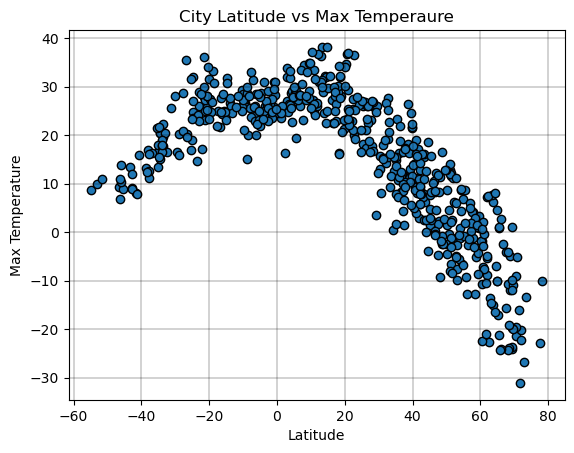

<Figure size 640x480 with 0 Axes>

In [13]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
# city_data_df.plot(kind='scatter', x='Lat', y='Max Temp')
# plt.show()

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(color='k', linestyle='-', linewidth=.25)
plt.title('City Latitude vs Max Temperaure')
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

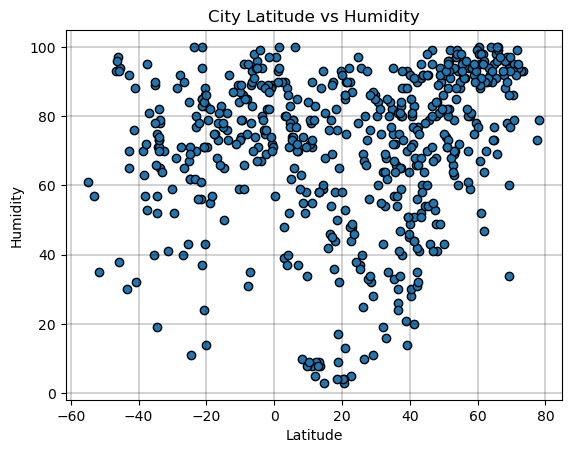

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# city_data_df.plot(kind='scatter', x='Lat', y='Humidity')
# plt.show()

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(color='k', linestyle='-', linewidth=.25)
plt.title('City Latitude vs Humidity')
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

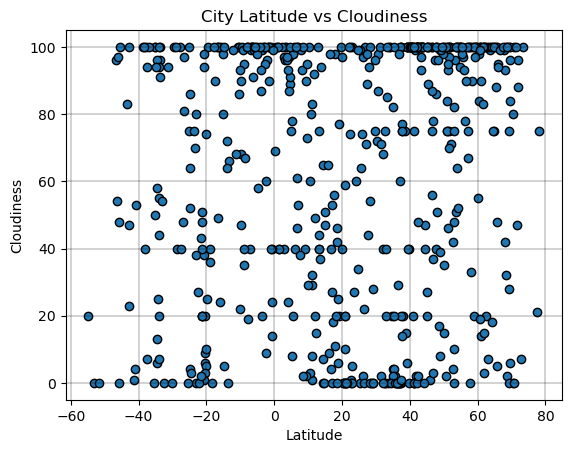

<Figure size 640x480 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness')
# plt.show()

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='k', linestyle='-', linewidth=.25)
plt.title('City Latitude vs Cloudiness')
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

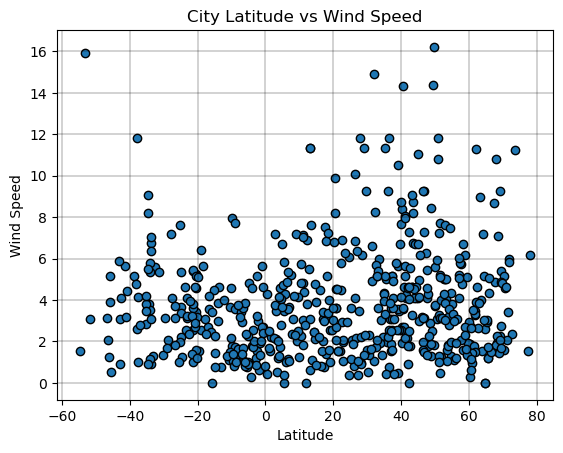

<Figure size 640x480 with 0 Axes>

In [17]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed')

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='k', linestyle='-', linewidth=.25)
plt.title('City Latitude vs Wind Speed')
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #plotting 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")    
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]
# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#plot_linear_regression(x_values, y_values, title, text_coordinates):
plot_linear_regression(x_values, y_values, "Max Temp",(10,-35))


In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, "Max Temp",(-25,5))

**Discussion about the linear relationship:** 
Calculating the linear regression and r values for latitude and maximum temperature shows a significant relationship between the latitude of a city or location and the max temps that city will experience in the northern hemisphere. For the southern hemisphere a moderate to strong correlation is detected. As the measurement increases (+) or decreases (-) from zero (the equator), the maximum temperatures decrease. Stated another way, the above two linear regression plots show that the farther away from the equator that you travel, the lower the temperatures. 

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#plot_linear_regression(x_values, y_values, title, text_coordinates):
plot_linear_regression(x_values, y_values, "Humidity",(47,20))

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, "Humidity",(-25,20))

**Discussion about the linear relationship:** 
The linear regression plots and r value calculations for latitude and humidity show a weak relationship between the two. As one moves further away from the equator (latitude of 0) there is some likelihood that the humidity will decrease. Stated another way, the closer you are to the equator, the higher the humidity in many locations. There are many instances where local geography will influence the micro climate of an area, which is indicated by an absence of strong correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#plot_linear_regression(x_values, y_values, title, text_coordinates):
plot_linear_regression(x_values, y_values, "Cloudiness",(47,20))

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, "Cloudiness",(-25,20))

**Discussion about the linear relationship:** Based on the linear regression calculations and the r values for latitude and cloudiness it seems there is no correlation between the two for the northern hemisphere and a very weak correlation between the two for the southern hemisphere showing as you get farther away from the equator the less cloudy it is in some cases. 

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#plot_linear_regression(x_values, y_values, title, text_coordinates):
plot_linear_regression(x_values, y_values, "Wind Speed",(5,15))

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, "Wind Speed",(-25,12))

**Discussion about the linear relationship:** 
The linear regression models for latitude and wind speed for the northern hemisphere show no correlation or relationship. For the southern hemisphere there is weak correlation that indicates as you get farther from the equator the higher the wind speed. 